**Imports**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Chicago ###

**Reading In Data**

In [2]:
chi_df = pd.read_csv('./working_data_DEL_LATER/chi_accidents.csv')

In [3]:
chi_df.head(3)

,id,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),description,...,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight
0,A-2749141,2,2016-11-30 14:46:48,2016-11-30 20:46:48,42.305960,-87.960150,42.306916,-87.960918,0.077,Between IL-137/Buckley Rd/Peterson Rd and IL-1...,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-2749152,2,2016-11-30 14:58:59,2016-11-30 20:58:59,42.175870,-88.135770,42.174620,-88.135794,0.086,At US-14/Northwest Hwy - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
2,A-2749158,3,2016-11-30 15:14:24,2016-11-30 21:29:48,42.175897,-88.135769,42.174612,-88.135794,0.089,Between IL-22 and US-14/Northwest Hwy - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
chi_df.columns

Index(['id', 'severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'description', 'number', 'street',
       'side', 'city', 'county', 'state', 'zipcode', 'country', 'timezone',
       'airport_code', 'weather_timestamp', 'temperature(f)', 'wind_chill(f)',
       'humidity(%)', 'pressure(in)', 'visibility(mi)', 'wind_direction',
       'wind_speed(mph)', 'precipitation(in)', 'weather_condition', 'amenity',
       'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway',
       'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal',
       'turning_loop', 'sunrise_sunset', 'civil_twilight', 'nautical_twilight',
       'astronomical_twilight'],
      dtype='object')

In [5]:
chi_df.shape

(42472, 47)

In [6]:
chi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42472 entries, 0 to 42471
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     42472 non-null  object 
 1   severity               42472 non-null  int64  
 2   start_time             42472 non-null  object 
 3   end_time               42472 non-null  object 
 4   start_lat              42472 non-null  float64
 5   start_lng              42472 non-null  float64
 6   end_lat                42472 non-null  float64
 7   end_lng                42472 non-null  float64
 8   distance(mi)           42472 non-null  float64
 9   description            42472 non-null  object 
 10  number                 15879 non-null  float64
 11  street                 42472 non-null  object 
 12  side                   42472 non-null  object 
 13  city                   42471 non-null  object 
 14  county                 42472 non-null  object 
 15  st

In [7]:
chi_df.drop(columns = 'id', inplace = True)

**Addressing Null Counts**

In [8]:
chi_df.isna().sum().sort_values(ascending = False)[:20]

number                   26593
precipitation(in)        23129
wind_chill(f)            16332
wind_speed(mph)           2024
wind_direction             310
humidity(%)                244
visibility(mi)             120
temperature(f)             119
weather_condition          116
pressure(in)                68
weather_timestamp           64
timezone                     2
airport_code                 2
nautical_twilight            1
civil_twilight               1
sunrise_sunset               1
astronomical_twilight        1
city                         1
country                      0
give_way                     0
dtype: int64

In [9]:
chi_df[['number']]

,number
0,NaN
1,21500.0
2,21501.0
3,1194.0
4,7899.0
...,...
42467,NaN
42468,NaN
42469,3799.0
42470,NaN


In [10]:
#filling nulls in 'number' with 0
chi_df['number'].fillna(0, inplace = True)

In [11]:
#precipitation(in)
chi_df[['precipitation(in)']].value_counts()

precipitation(in)
0.00                 16032
0.01                  1012
0.02                   483
0.03                   312
0.04                   234
                     ...  
0.48                     1
0.46                     1
0.43                     1
0.37                     1
1.95                     1
Length: 78, dtype: int64

In [12]:
chi_df[['precipitation(in)']].mean()

precipitation(in)    0.011642
dtype: float64

In [13]:
chi_df[['precipitation(in)']].median()

precipitation(in)    0.0
dtype: float64

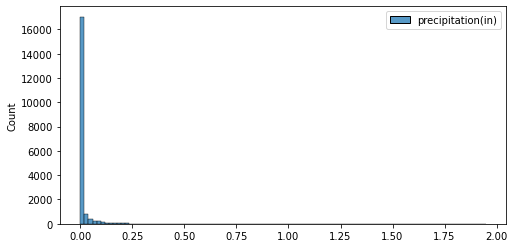

In [14]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['precipitation(in)']], bins = 100);

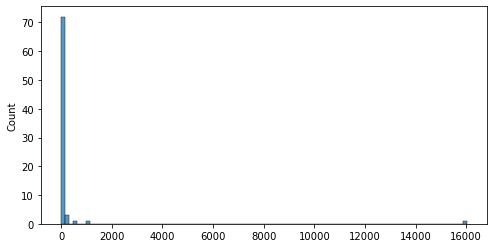

In [15]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['precipitation(in)']].value_counts().sort_index(), bins = 100);

In [16]:
chi_df['precipitation(in)'].fillna(0.00, inplace = True)

In [17]:
#wind_chill(f)
chi_df[['wind_chill(f)']].value_counts()

wind_chill(f)
 73.0            342
 31.0            336
 30.0            315
 72.0            304
 75.0            295
                ... 
 42.1              1
-18.3              1
-2.1               1
-3.1               1
-51.3              1
Length: 694, dtype: int64

In [18]:
chi_df[['wind_chill(f)']].value_counts().sort_index()

wind_chill(f)
-51.3             1
-50.5             1
-50.1             1
-48.5             1
-47.7             1
                 ..
 91.0            32
 92.0            35
 93.0            29
 94.0            26
 95.0             4
Length: 694, dtype: int64

In [19]:
chi_df[['wind_chill(f)']].mean()

wind_chill(f)    39.650593
dtype: float64

In [20]:
chi_df[['wind_chill(f)']].median()

wind_chill(f)    35.25
dtype: float64

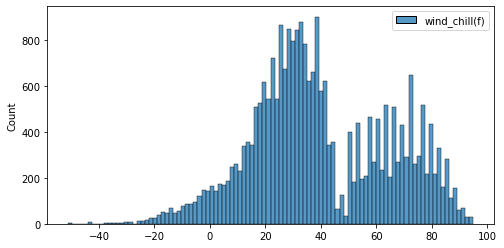

In [21]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['wind_chill(f)']], bins = 100);

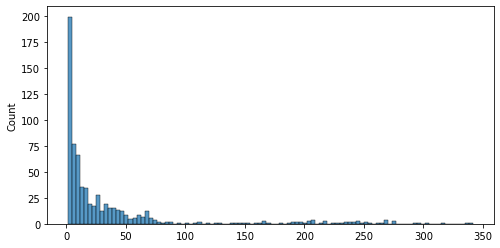

In [22]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['wind_chill(f)']].value_counts().sort_values(), bins = 100);

In [23]:
chi_df['wind_chill(f)'].fillna(35.25, inplace = True)

In [24]:
#wind_speed(mph)
chi_df[['wind_speed(mph)']].value_counts()[0::2]

wind_speed(mph)
9.2                2718
6.9                2522
5.8                2260
4.6                1903
12.7               1764
9.0                1373
3.5                1349
6.0                1276
0.0                1079
12.0               1072
16.1                865
14.0                784
18.4                505
17.0                364
18.0                290
23.0                241
21.9                200
22.0                127
25.3                 63
24.0                 46
28.8                 29
29.0                 21
27.6                 18
30.0                 11
31.1                  5
32.2                  4
32.0                  2
36.8                  2
42.6                  2
61.0                  1
dtype: int64

In [25]:
chi_df[['wind_speed(mph)']].value_counts().sort_index()[0::2]

wind_speed(mph)
0.0                1079
3.5                1349
5.0                1076
6.0                1276
7.0                1342
8.1                2549
9.2                2718
10.4               2437
12.0               1072
13.0                896
14.0                784
16.0                441
17.0                364
18.0                290
19.6                363
20.7                256
21.9                200
23.0                241
24.2                 88
25.3                 63
26.5                 47
28.0                 19
29.0                 21
30.0                 11
31.1                  5
32.2                  4
34.5                  5
36.8                  2
39.1                  2
61.0                  1
dtype: int64

In [26]:
chi_df[['wind_speed(mph)']].mean()

wind_speed(mph)    10.003125
dtype: float64

In [27]:
chi_df[['wind_speed(mph)']].median()

wind_speed(mph)    9.2
dtype: float64

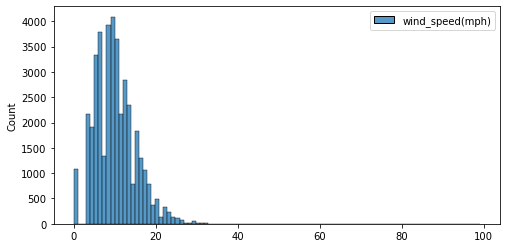

In [28]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['wind_speed(mph)']], bins = 100);

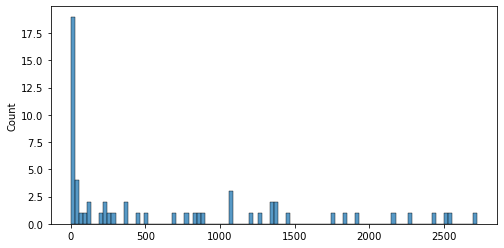

In [29]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['wind_speed(mph)']].value_counts().sort_index(), bins = 100);

In [30]:
chi_df['wind_speed(mph)'].fillna(9.2, inplace = True)

In [31]:
#for frame of reference:
chi_df.isna().sum().sort_values(ascending = False)[:15]

wind_direction           310
humidity(%)              244
visibility(mi)           120
temperature(f)           119
weather_condition        116
pressure(in)              68
weather_timestamp         64
timezone                   2
airport_code               2
nautical_twilight          1
civil_twilight             1
sunrise_sunset             1
astronomical_twilight      1
city                       1
county                     0
dtype: int64

In [32]:
#MESSAGE TO GROUP
#MESSAGE TO GROUP
#MESSAGE TO GROUP
#MESSAGE TO GROUP

#I wasn't sure what to do with the 'wind_direction' var
#Your input would be appreciated

#MESSAGE TO GROUP
#MESSAGE TO GROUP
#MESSAGE TO GROUP
#MESSAGE TO GROUP

#wind_direction
chi_df[['wind_direction']].value_counts(ascending = False)

wind_direction
SSW               3110
West              2968
WSW               2767
SW                2546
South             2419
WNW               2412
NNE               2356
NE                2119
NW                2036
ENE               1979
NNW               1699
Calm              1658
North             1647
SSE               1645
East              1597
SE                1500
ESE               1485
W                 1295
S                 1190
E                 1190
CALM              1079
N                  609
Variable           579
VAR                277
dtype: int64

In [33]:
#https://stackoverflow.com/questions/44231598/python-pandas-get-dataframe-value-counts-result-as-list
chi_df['wind_direction'].value_counts()
chi_wind = chi_df['wind_direction'].value_counts()
chi_wind_dict = dict(chi_wind)

chi_wind_names = chi_wind_dict.keys()
chi_wind_values = chi_wind_dict.values()

In [34]:
#Colors for pie charts:
#https://stackoverflow.com/questions/21034830/how-can-i-generate-more-colors-on-pie-chart-matplotlib
import random
import matplotlib.colors as mcolors

colors = random.choices(list(mcolors.CSS4_COLORS.values()), k = 25)

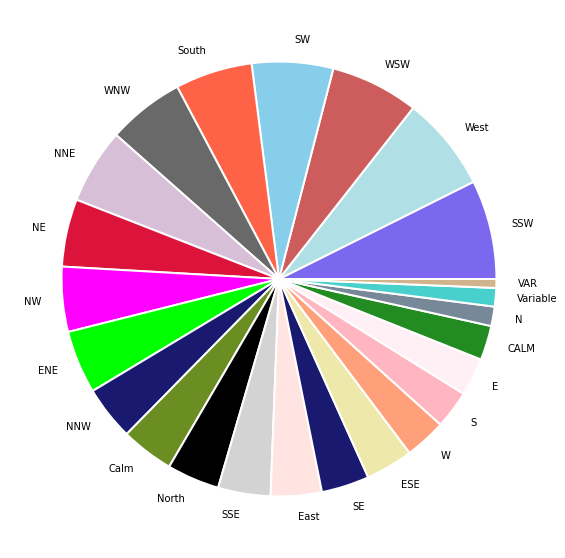

In [35]:
#https://www.python-graph-gallery.com/pie-plot-matplotlib-basic
plt.rcParams["figure.figsize"] = (10, 10)

# Create a pieplot
plt.pie(chi_wind_values, labels = chi_wind_names, colors = colors, 
        labeldistance = 1.1, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' });
plt.show();

In [36]:
#'humidity(%)'
chi_df[['humidity(%)']].value_counts()

humidity(%)
93.0           1446
89.0           1034
100.0           945
76.0            884
61.0            845
               ... 
16.0              4
17.0              2
13.0              2
14.0              1
6.0               1
Length: 88, dtype: int64

In [37]:
chi_df[['humidity(%)']].value_counts().sort_index()

humidity(%)
6.0              1
13.0             2
14.0             1
16.0             4
17.0             2
              ... 
96.0           755
97.0           460
98.0            66
99.0            89
100.0          945
Length: 88, dtype: int64

In [38]:
chi_df[['humidity(%)']].mean()

humidity(%)    67.334375
dtype: float64

In [39]:
chi_df[['humidity(%)']].median()

humidity(%)    68.0
dtype: float64

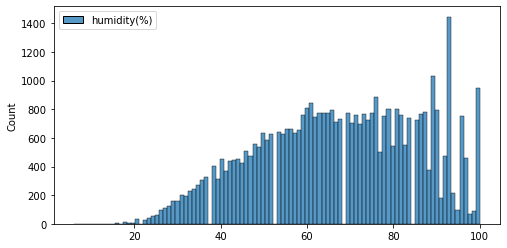

In [40]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['humidity(%)']], bins = 100);

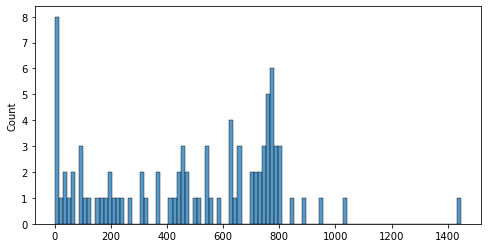

In [41]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['humidity(%)']].value_counts().sort_index(), bins = 100);

In [42]:
chi_df['humidity(%)'].fillna(68.0, inplace = True)

In [43]:
#'visibility(mi)'
chi_df[['visibility(mi)']].value_counts()[0::2]

visibility(mi)
10.00             32663
9.00               1278
8.00                935
3.00                795
2.00                625
2.50                328
0.50                199
1.20                153
0.20                100
0.75                 66
0.10                 24
0.00                 12
1.10                  4
0.06                  2
dtype: int64

In [44]:
chi_df[['visibility(mi)']].value_counts().sort_index()[0::2]

visibility(mi)
0.0                 12
0.1                 24
0.2                100
0.5                199
0.8                142
1.1                  4
1.5                228
2.0                625
3.0                795
5.0               1061
7.0               1296
9.0               1278
12.0                 9
20.0                64
dtype: int64

In [45]:
chi_df[['visibility(mi)']].mean()

visibility(mi)    8.896925
dtype: float64

In [46]:
chi_df[['visibility(mi)']].median()

visibility(mi)    10.0
dtype: float64

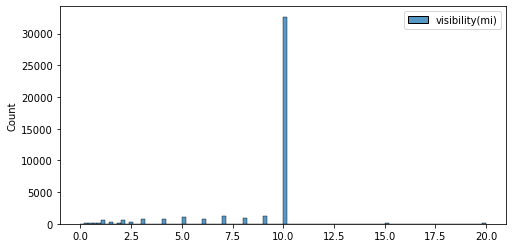

In [47]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['visibility(mi)']], bins = 100);

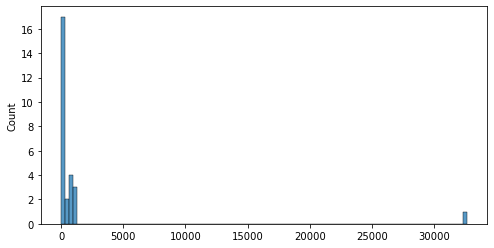

In [48]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['visibility(mi)']].value_counts().sort_index(), bins = 100);

In [49]:
chi_df['visibility(mi)'].fillna(10.0, inplace = True)

In [50]:
#temperature(f)
chi_df[['temperature(f)']].value_counts()

temperature(f)
73.0              814
72.0              738
32.0              707
75.0              695
79.0              688
                 ... 
14.7                1
14.2                1
13.8                1
13.3                1
168.8               1
Length: 558, dtype: int64

In [51]:
chi_df[['temperature(f)']].value_counts().sort_index()

temperature(f)
-22.4              1
-21.1              1
-20.9              4
-20.2              1
-20.0              2
                  ..
 93.9             21
 94.0             26
 95.0             13
 96.1              2
 168.8             1
Length: 558, dtype: int64

In [52]:
chi_df[['temperature(f)']].mean()

temperature(f)    53.024249
dtype: float64

In [53]:
chi_df[['temperature(f)']].median()

temperature(f)    53.1
dtype: float64

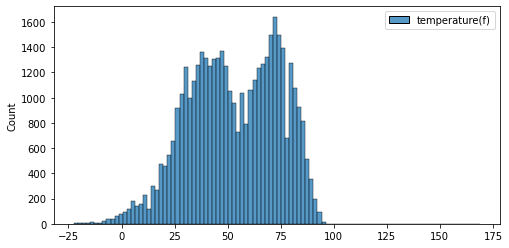

In [54]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['temperature(f)']], bins = 100);

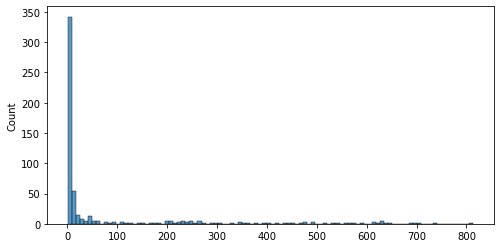

In [55]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['temperature(f)']].value_counts().sort_index(), bins = 100);

In [56]:
chi_df['temperature(f)'].fillna(53.1, inplace = True)

In [57]:
#for frame of reference:
chi_df.isna().sum().sort_values(ascending = False)[:13]

wind_direction           310
weather_condition        116
pressure(in)              68
weather_timestamp         64
airport_code               2
timezone                   2
city                       1
nautical_twilight          1
civil_twilight             1
sunrise_sunset             1
astronomical_twilight      1
side                       0
station                    0
dtype: int64

In [58]:
#MESSAGE TO GROUP
#MESSAGE TO GROUP
#MESSAGE TO GROUP
#MESSAGE TO GROUP

#I wasn't sure what to do with the '#weather_condition' var
#Your input would be appreciated

#MESSAGE TO GROUP
#MESSAGE TO GROUP
#MESSAGE TO GROUP
#MESSAGE TO GROUP

#weather_condition
chi_df[['weather_condition']].value_counts()

weather_condition           
Clear                           6931
Mostly Cloudy                   6876
Overcast                        6509
Fair                            5160
Partly Cloudy                   4574
Cloudy                          3447
Scattered Clouds                2374
Light Rain                      2193
Light Snow                      1610
Haze                             357
Rain                             341
Fog                              292
Light Drizzle                    242
Fair / Windy                     130
Mostly Cloudy / Windy            122
Cloudy / Windy                   114
Snow                             108
Light Thunderstorms and Rain     108
Heavy Rain                        94
Light Rain with Thunder           77
T-Storm                           73
Wintry Mix                        70
Light Freezing Rain               57
Thunderstorm                      56
Light Rain / Windy                50
Thunderstorms and Rain            50
Partly Cl

In [59]:
#top 25 frequent weather conditions:
chi_df[['weather_condition']].value_counts()[:25]

weather_condition           
Clear                           6931
Mostly Cloudy                   6876
Overcast                        6509
Fair                            5160
Partly Cloudy                   4574
Cloudy                          3447
Scattered Clouds                2374
Light Rain                      2193
Light Snow                      1610
Haze                             357
Rain                             341
Fog                              292
Light Drizzle                    242
Fair / Windy                     130
Mostly Cloudy / Windy            122
Cloudy / Windy                   114
Snow                             108
Light Thunderstorms and Rain     108
Heavy Rain                        94
Light Rain with Thunder           77
T-Storm                           73
Wintry Mix                        70
Light Freezing Rain               57
Thunderstorm                      56
Light Rain / Windy                50
dtype: int64

In [60]:
chi_df['weather_condition'].value_counts()[:25]
chi_weather = chi_df['weather_condition'].value_counts()[:25]
chi_weather_dict = dict(chi_weather)

chi_weather_names = chi_weather_dict.keys()
chi_weather_values = chi_weather_dict.values()

colors = random.choices(list(mcolors.CSS4_COLORS.values()), k = 25)

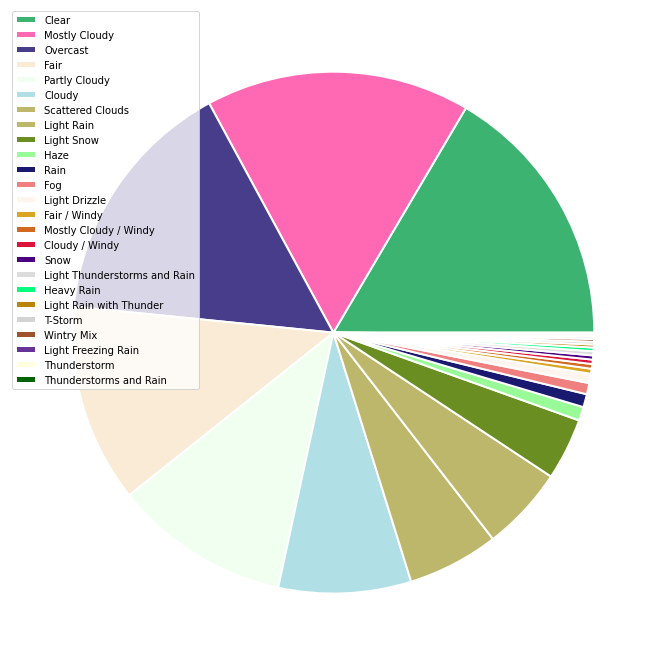

In [61]:
plt.rcParams["figure.figsize"] = (12, 12)

# Create a pieplot
plt.pie(chi_weather_values, labels = chi_weather_names, colors = colors, 
        labeldistance = None, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' });
plt.legend(loc = 0)
plt.show();

In [62]:
#pressure
chi_df[['pressure(in)']].value_counts()

pressure(in)
29.94           676
29.91           598
29.99           568
30.06           565
30.01           558
               ... 
28.54             1
28.64             1
28.61             1
28.60             1
30.96             1
Length: 230, dtype: int64

In [63]:
chi_df[['pressure(in)']].value_counts().sort_index()

pressure(in)
20.41           1
28.54           1
28.59           2
28.60           1
28.61           1
               ..
30.83           9
30.84           4
30.86           1
30.91           2
30.96           1
Length: 230, dtype: int64

In [64]:
#GO BACK IN CODE AND CHANGE THE REST OF MEAN/MEDIAN TO COMMAS:
#GO BACK IN CODE AND CHANGE THE REST OF MEAN/MEDIAN TO COMMAS:
#GO BACK IN CODE AND CHANGE THE REST OF MEAN/MEDIAN TO COMMAS:

#GO BACK IN CODE AND CHANGE THE REST OF MEAN/MEDIAN TO COMMAS:
#GO BACK IN CODE AND CHANGE THE REST OF MEAN/MEDIAN TO COMMAS:
#GO BACK IN CODE AND CHANGE THE REST OF MEAN/MEDIAN TO COMMAS:

chi_df[['pressure(in)']].mean(), chi_df[['pressure(in)']].median()

(pressure(in)    29.768081
 dtype: float64,
 pressure(in)    29.88
 dtype: float64)

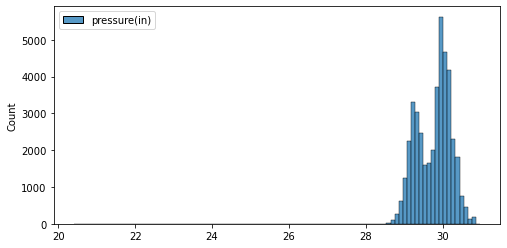

In [65]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['pressure(in)']], bins = 100);

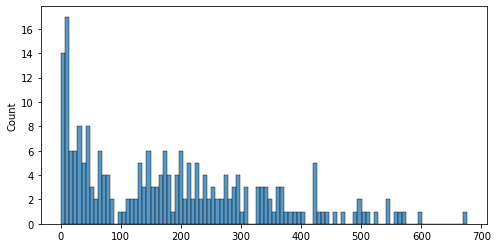

In [66]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['pressure(in)']].value_counts().sort_index(), bins = 100);

In [67]:
chi_df['pressure(in)'].fillna(29.88, inplace = True)

In [68]:
#MESSAGE TO GROUP
#MESSAGE TO GROUP
#MESSAGE TO GROUP
#MESSAGE TO GROUP

#I wasn't sure what to do with the '#weather_timestamp' var
#Your input would be appreciated

#MESSAGE TO GROUP
#MESSAGE TO GROUP
#MESSAGE TO GROUP
#MESSAGE TO GROUP

#weather_timestamp
chi_df[['weather_timestamp']].value_counts()

weather_timestamp  
2020-10-14 11:52:00    20
2020-12-29 12:52:00    16
2017-12-04 16:52:00    14
2020-06-19 15:52:00    14
2017-10-12 14:59:00    13
                       ..
2018-07-13 01:53:00     1
2017-01-10 07:29:00     1
2018-07-12 16:53:00     1
2017-01-10 07:51:00     1
2019-02-08 09:51:00     1
Length: 27922, dtype: int64

In [69]:
chi_df[['weather_timestamp']].value_counts().sort_index()

weather_timestamp  
2016-06-17 14:51:00    5
2016-06-17 14:52:00    1
2016-06-17 14:53:00    1
2016-06-17 15:52:00    1
2016-06-17 15:53:00    3
                      ..
2020-12-31 17:15:00    1
2020-12-31 17:35:00    1
2020-12-31 19:45:00    5
2020-12-31 20:52:00    4
2020-12-31 21:55:00    2
Length: 27922, dtype: int64

In [70]:
#checking null counts
chi_df.isna().sum().sort_values(ascending = False)

wind_direction           310
weather_condition        116
weather_timestamp         64
airport_code               2
timezone                   2
astronomical_twilight      1
city                       1
nautical_twilight          1
civil_twilight             1
sunrise_sunset             1
traffic_calming            0
stop                       0
precipitation(in)          0
amenity                    0
bump                       0
turning_loop               0
crossing                   0
give_way                   0
junction                   0
no_exit                    0
traffic_signal             0
railway                    0
roundabout                 0
station                    0
wind_speed(mph)            0
severity                   0
visibility(mi)             0
start_time                 0
end_time                   0
start_lat                  0
start_lng                  0
end_lat                    0
end_lng                    0
distance(mi)               0
description   